<img src="https://ts1.cn.mm.bing.net/th/id/R-C.58c93ffe86fd63d4612fa936b26ca70c?rik=3pZtzfRbPLmAeg&riu=http%3a%2f%2fstatics.phbs.pku.edu.cn%2fstatics%2fimages%2fphbs_2017%2findex_logo.png&ehk=pTpCI9AZbDr2LSA8iYICtlHbI10JzVwazjq7PlqONdU%3d&risl=&pid=ImgRaw&r=0" width=5%/>

# <center>  Snowball Option pricing under Monte Carlo simulation
##### <center> Chen Wanqing, Chen Ziying

## 2. Volatility Calibration

### 2.1 BS Model
#### 2.1.1 PDE
**Underlying price following GBM**
$$ \frac{dS_{t}}{S_t} = r dt + \sigma dW_t  \tag{1}$$
**Volatility is constant in the case of BS**

#### 2.1.2 discretization
**Underlying price has a solution:**
$$ log(\frac{S_{t+\Delta_t}}{S_t}) = (r - 0.5  \sigma^2)  \Delta_t + \sigma \sqrt{\Delta_t} W_1 \tag{2}$$


### 2.2 Heston Model
#### 2.2.1 PDE
**Underlying price following GBM**
$$ \frac{dS_{t}}{S_t} = r dt + \sigma_t dW_t  \tag{3}$$
**Volatility follows Heston model**
$$ dv_t = \kappa (\theta - v_t) dt + \nu \sqrt{v_t}dZ_t  \tag{4}$$
**the correlation between $W_t$ and $Z_t$ is rho**
$$dW_t = \rho dZ_t + \rho_*dX_t, \rho_*=\sqrt{1-\rho^2} \tag{5}$$

#### 2.1.2 discretization
**Underlying price has a solution:**
$$ log(\frac{S_{t+\Delta_t}}{S_t}) = (r - 0.5  \sigma_t^2)  \Delta_t + \sigma_t \sqrt{\Delta_t} W_1 \tag{6}$$
**Euler scheme for time discretization of volatility**
$$ v_{t+\Delta_t} = v_t + \kappa (\theta - v_t) \Delta_t + \nu \sqrt{v_t \Delta_t}Z1  \tag{7} $$
**Andersen's method to solve the problem of v_t below zero**
Andersen L (2008) Simple and efficient simulation of the Heston stochastic volatility model. Journal of Computational Finance 11:1–42. https://doi.org/10.21314/JCF.2008.189


### 2.3 Calibration results

#### 2.3.1 Data
We obtained the volatility data of the CSI500ETF vanilla option from the wind. The data begins at 2022/09/19 when the option is listed. The data we use has a 1 year maturity.

In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfeng as pf
from PyFENG.pyfeng.snowball import *

The shown in below, the data has different strikes, the columns 600/800/... means  the strike is 60%/80%/... of the spot price.
The dates start at 2022/09/19 and end at 2022/10/25

In [151]:
IV_df = pd.read_excel('IV_with_different_strike_1Y.xlsx', header=2)
strike_ls = [600,800,900,950,975,1000, 1025, 1050, 1100, 1200, 1300]
IV_df.columns = ['date'] +IV_df.columns[1:].str[10:].tolist()
IV_df = IV_df.set_index('date')
IV_df =IV_df[[str(x) for x in strike_ls]]
IV_df = IV_df.dropna(axis=0)
IV_df

,600,800,900,950,975,1000,1025,1050,1100,1200,1300
date,,,,,,,,,,,
20220919,23.88,24.15,22.76,22.51,22.36,22.25,22.40,22.14,22.20,21.96,22.80
20220920,27.80,24.71,23.16,22.75,22.45,22.15,22.02,21.95,21.81,21.96,22.20
20220921,25.41,23.76,23.06,22.73,22.58,22.42,22.27,22.13,21.85,21.33,20.87
20220922,27.70,24.89,23.49,22.93,22.53,22.18,21.99,21.83,21.61,21.80,22.55
20220923,28.70,25.48,23.87,23.16,22.77,22.43,22.26,22.16,21.85,21.85,22.04
20220926,28.09,25.61,24.37,23.70,23.33,22.92,22.64,22.48,22.23,22.25,22.68
20220927,29.45,25.61,23.69,22.99,22.67,22.37,22.12,21.90,21.64,21.67,21.88
20220928,33.63,27.71,24.89,24.18,23.73,23.44,23.23,22.99,22.77,22.72,23.09
20220929,31.73,27.01,24.69,23.87,23.61,23.39,23.17,22.92,22.69,22.78,23.04


We choose the date 2022/10/19 and fit the volatility curve. 2022/10/19 is chosen because:
- the option is listed at the date 2022/09/19 so the liquidity at the beginning of the dates would be not so good, and the vol smile might be biased.
- October has a long holiday and a before and after the holiday the market was quite volatile.
- After 2022/10/21, the market again experienced dramatic drop...
- 2022/10/19 might be suitable since the option has listed one month.

#### 2.3.2 BS model
Under BS model, the volatility is constant, we just assume sigma=0.24.

*Note: the interest rate is a 1 year CDB(China Development Bank) bond, because CDB bond is the most liquid bond in China market, and more liquid than goverment bond.*

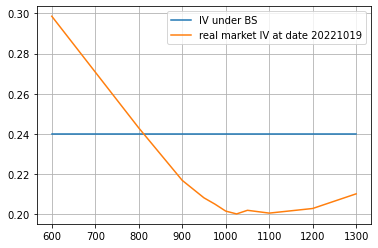

In [219]:
model_BS = pf.Bsm(sigma=0.24, intr=0.019155, divr=0)
vol_BS = model_BS.vol_smile(np.array(strike_ls)/1000 * 5.919, 5.919, texp=1, model='bsm')

date = 20221019
plt.plot(strike_ls, vol_BS, label='IV under BS')
plt.plot(strike_ls, IV_df.loc[date,:]/100, label='real market IV at date {}'.format(date))
plt.legend()
plt.grid()
plt.show()

When sigma=0.24, we get the price of snowball with spot of 5955.52, 3 year maturity, 15.2% coupon rate, 75% knock-in bound, 100% knock-out bond under the Heston model is 10640.56, with 10000 notional. The result is not satisfying.

In [220]:
texp = 3
coupon_rate = 0.152
bound = [0.75, 1]
notional = 10000
snowball = Snowball(BSMC, texp, coupon_rate, bound, n_path=10000)
snowball.set_model_param(sigma=0.24)
price = snowball.price(5955.52)
print(price)

10640.567950152112


#### 2.3.3 Calibrate Heston Model
At date 2022/10/19, we find the parameters that fits the real market volatility smile:
sigma=0.04, vov=0.5, rho=-0.3, mr=0.5, theta=0.1

*Note: the interest rate is a 1 year CDB(China Development Bank) bond, because CDB bond is the most liquid bond in China market, and more liquid than goverment bond.*

In [203]:
model_Heston = pf.HestonFft(sigma=0.04, vov=0.5, rho=-0.3, mr=0.5, theta=0.1, intr=0.019155)
vol_Heston = model_Heston.vol_smile(np.array(strike_ls)/1000 * 5.919, 5.919, texp=1)

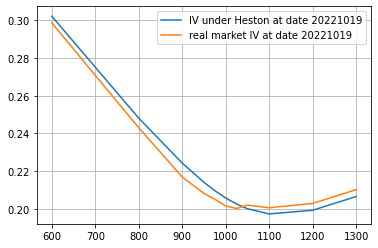

In [204]:
date = 20221019
plt.plot(strike_ls, vol_Heston, label='IV under Heston at date {}'.format(date))
plt.plot(strike_ls, IV_df.loc[date,:]/100, label='real market IV at date {}'.format(date))
plt.legend()
plt.grid()
plt.show()

Using the parameters we get the price of snowball with spot of 5955.52, 3 year maturity, 15.2% coupon rate, 75% knock-in bound, 100% knock-out bond under the Heston model is 9615.16, with 10000 notional.

In [210]:
texp = 3
coupon_rate = 0.152
bound = [0.75, 1]
notional = 10000
snowball = Snowball(HestonMC, texp, coupon_rate, bound, n_path=10000)
snowball.set_model_param(sigma=0.04, vov=0.5, rho=-0.3, mr=0.5, theta=0.1, intr=0.019155)
price = snowball.price(5955.52, Andersen=True)
print(price)

9615.162828559283


In [214]:
# strike_ls = [600,800,900,950,975,1000, 1025, 1050, 1100, 1200, 1300]
# for sigma in np.linspace(0.001, 0.2, 50):
#     model_BS = pf.Bsm(sigma=sigma, intr=0.019155, divr=0)
#     vol_BS = model_BS.vol_smile(np.array(strike_ls)/1000 * 5.919, 5.919, texp=1, model='bsm')
#     date = 20220919
#     plt.plot(strike_ls, vol_BS, label='IV under BS at date {}'.format(date))
#     plt.plot(strike_ls, IV_df.loc[date,:]/100, label='real market IV at date {}'.format(date))
#     plt.title('sigma = '+str(sigma))
#     plt.legend()
#     plt.grid()
#     plt.show()